**Project objective:**

- The main objective is to analyze user cohorts defined by the month of creation of their first cash advance. (cohort = month_created)
- Track the monthly evolution of key metrics for each cohort.
- Gain insights into user behavior and financial services performance.

**Metrics to Analyze:**

1. **Frequency of Service Usage:** Understand how often users from each cohort utilize IronHack Payments' cash advance services over time.
2. **Incident Rate:** Determine the incident rate, specifically focusing on payment incidents, for each cohort. Identify if there are variations in incident rates among different cohorts.
3. **Revenue Generated by the Cohort:** Calculate the total revenue generated by each cohort over months to assess the financial impact of user behavior.
4. **New Relevant Metric:** Propose and calculate a new relevant metric that provides additional insights into user behavior or the performance of IronHack Payments' services.

### Perform a Exploratory Data Analysis

1. Gain comprehensive understanding of the data set
2. Explore key statistics, distributions, correlations and visualizations to identify patterns and outliers.
3. Investigate and address missing data values, data inconsistencies and potential errors.
4. Implement data cleaning and preprocessing steps to ensure the reliability of the analysis.
5. Document any data quality issues encountered and the steps taken to address them.

In [50]:
# import pandas, numpy, matplotlib, seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [18]:
# load datasets
cash_request = pd.read_csv('project_dataset/extract - cash request - data analyst.csv')
fees = pd.read_csv('project_dataset/extract - fees - data analyst - .csv')

In [62]:
# check dataset
display(cash_request, fees)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804,2019-12-11 16:47:42.405646+00,0,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,201912
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231,2019-12-11 14:24:22.897988+00,0,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,201912
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191,2019-12-11 09:46:59.777728+00,0,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,201912
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761,2019-12-18 14:26:18.128407+00,0,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,201912
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686,2020-05-07 09:21:55.320193+00,0,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,202005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00:00,2021-02-06 20:17:49.292493+00,13681,NaN,0,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN,202010
23966,25243,50.0,money_back,2020-10-27 14:41:25.734910+00:00,2020-12-18 13:15:40.843946+00,0,NaN,30367,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00,202010
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00:00,2021-02-05 12:19:30.656816+00,82122,NaN,0,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN,202010
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00:00,2021-02-05 13:14:19.707627+00,64517,NaN,0,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN,202010


,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment,cohort
0,6537,14941,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2019-12-10 19:05:21.596873+00:00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after,201912
1,6961,11714,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2019-12-10 19:50:12.347780+00:00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after,201912
2,16296,23371,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2019-12-10 19:13:35.825460+00:00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after,201912
3,20775,26772,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2019-12-10 19:16:10.880172+00:00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after,201912
4,11242,19350,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-05-06 09:59:38.877376+00:00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after,202005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21056,12372,20262,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 20262,2020-10-27 16:33:26.154592+00:00,2020-10-13 14:25:04.18049+00,2020-11-17 05:14:00.080854+00,NaN,NaN,after,202010
21057,20768,26764,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 26764,2020-09-08 11:56:48.991199+00:00,2020-10-31 15:24:18.680715+00,2020-12-16 07:10:54.697639+00,NaN,NaN,after,202009
21058,18779,25331,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 25331,2020-10-27 17:51:56.748770+00:00,2020-10-27 17:28:51.7492+00,2020-11-18 04:35:42.915511+00,NaN,NaN,after,202010
21059,16542,23628,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 23628,2020-10-27 18:08:14.958105+00:00,2020-10-23 16:27:52.047486+00,2020-12-18 05:18:01.465317+00,NaN,NaN,after,202010


In [22]:
#check data types

cash_request.dtypes

id                              int64
amount                        float64
status                         object
created_at                     object
updated_at                     object
user_id                       float64
moderated_at                   object
deleted_account_id            float64
reimbursement_date             object
cash_request_received_date     object
money_back_date                object
transfer_type                  object
send_at                        object
recovery_status                object
reco_creation                  object
reco_last_update               object
dtype: object

In [23]:
fees.dtypes

id                   int64
cash_request_id    float64
type                object
status              object
category            object
total_amount       float64
reason              object
created_at          object
updated_at          object
paid_at             object
from_date           object
to_date             object
charge_moment       object
dtype: object

In [24]:
cash_request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [25]:
fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [30]:
# check for missing values

cash_request_missing_values = cash_request.isnull().sum()
print(cash_request_missing_values)

id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
dtype: int64


In [31]:
fees_missing_values = fees.isnull().sum()
print(fees_missing_values)

id                     0
cash_request_id        4
type                   0
status                 0
category           18865
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5530
from_date          13295
to_date            13295
charge_moment          0
dtype: int64


In [5]:
# check for duplicates

duplicate_rows = cash_request.duplicated()
print(duplicate_rows)

In [34]:
# replace NAN values with 0

fees['cash_request_id'].fillna(0, inplace=True)

In [36]:
# replace NAN values with 0
#cash_request[['user_id', 'deleted_account_id']].fillna(0, inplace=True)

cash_request.loc[:, ['user_id', 'deleted_account_id']] = cash_request.loc[:, ['user_id', 'deleted_account_id']].fillna(0)

In [37]:
# implement data cleaning steps

#1. convert cash_request_id in fees to int:
fees['cash_request_id'] = fees['cash_request_id'].astype(int)

In [42]:
# implement data cleaning steps

#2. convert user_id and deleted_account_id in cash_request table to int:
cash_request[['user_id', 'deleted_account_id']] = cash_request[['user_id', 'deleted_account_id']].astype(int)


In [55]:
# implement data cleaning steps

#3. convert date columns to datetime format:

#date_columns_cash_request = ['created_at', 'updated_at', 'reimbursement_date', 'cash_request_received_date', 'money_back_date', 'send_at', 'reco_creation', 'reco_last_update']
#cash_request[date_columns_cash_request] = cash_request[date_columns_cash_request].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f%z')

cash_request['created_at'] = pd.to_datetime(cash_request['created_at'], format='%Y-%m-%d %H:%M:%S.%f%z')
cash_request['cohort'] = cash_request['created_at'].dt.strftime('%Y%m')

#if I want to conver "cohort" into datetime: cash_request['cohort'] = cash_request.to_datetime(cash_request['cohort'], format='%Y%m')

fees['created_at'] = pd.to_datetime(cash_request['created_at'], format='%Y-%m-%d %H:%M:%S.%f%z')
fees['cohort'] = fees['created_at'].dt.strftime('%Y%m')

#### getting an error because the date columns are not all in the same format.
#### solution: do one by one

In [54]:
#check data types to see if changes were made
cash_request.dtypes

id                                          int64
amount                                    float64
status                                     object
created_at                    datetime64[ns, UTC]
updated_at                                 object
user_id                                     int32
moderated_at                               object
deleted_account_id                          int32
reimbursement_date                         object
cash_request_received_date                 object
money_back_date                            object
transfer_type                              object
send_at                                    object
recovery_status                            object
reco_creation                              object
reco_last_update                           object
cohort                                     object
dtype: object

In [56]:
#check data types to see if changes were made
fees.dtypes

id                               int64
cash_request_id                  int32
type                            object
status                          object
category                        object
total_amount                   float64
reason                          object
created_at         datetime64[ns, UTC]
updated_at                      object
paid_at                         object
from_date                       object
to_date                         object
charge_moment                   object
cohort                          object
dtype: object

In [58]:
# explore key statistics, distributions and correlations
## calculate basic statistics (mean, median, standard deviation, etc.) for numeric columns.

cash_request_stats = cash_request.describe()
fees_stats = cash_request.describe()

display(cash_request_stats, fees_stats)


,id,amount,user_id,deleted_account_id
count,23970.000000,23970.000000,23970.000000,23970.000000
mean,13910.966124,82.720818,29722.745557,847.810638
std,7788.117214,26.528065,27943.261215,3612.115591
min,3.000000,1.000000,0.000000,0.000000
25%,7427.250000,50.000000,7663.000000,0.000000
50%,14270.500000,100.000000,20805.000000,0.000000
75%,20607.750000,100.000000,43198.500000,0.000000
max,27010.000000,200.000000,103719.000000,30445.000000


,id,amount,user_id,deleted_account_id
count,23970.000000,23970.000000,23970.000000,23970.000000
mean,13910.966124,82.720818,29722.745557,847.810638
std,7788.117214,26.528065,27943.261215,3612.115591
min,3.000000,1.000000,0.000000,0.000000
25%,7427.250000,50.000000,7663.000000,0.000000
50%,14270.500000,100.000000,20805.000000,0.000000
75%,20607.750000,100.000000,43198.500000,0.000000
max,27010.000000,200.000000,103719.000000,30445.000000


In [61]:
# explore key statistics, distributions and correlations

### calculate correlations (NOT USEFUL)

#correlation_matrix = cash_request.corr(numeric_only=True)
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation Heatmap')
#plt.show()

In [70]:
# create a cohort table with all infos I need:

## cash_request table: id, user_id, cohort, amount
cash_request_slice = cash_request[['id', 'user_id', 'cohort', 'amount','status']]


## fees table: cash_request_id, type, status, total_amount, charge moment
fees_slice = fees[['cash_request_id', 'type', 'status', 'total_amount', 'charge_moment']]

display(cash_request_slice, fees_slice)
cash_request_slice.info()
fees_slice.info()

,id,user_id,cohort,amount,status
0,5,804,201912,100.0,rejected
1,70,231,201912,100.0,rejected
2,7,191,201912,100.0,rejected
3,10,761,201912,99.0,rejected
4,1594,7686,202005,100.0,rejected
...,...,...,...,...,...
23965,20616,13681,202010,100.0,money_back
23966,25243,0,202010,50.0,money_back
23967,22357,82122,202010,100.0,money_back
23968,20256,64517,202010,100.0,money_back


,cash_request_id,type,status,total_amount,charge_moment
0,14941,instant_payment,rejected,5.0,after
1,11714,incident,accepted,5.0,after
2,23371,instant_payment,accepted,5.0,after
3,26772,instant_payment,accepted,5.0,after
4,19350,instant_payment,accepted,5.0,after
...,...,...,...,...,...
21056,20262,instant_payment,rejected,5.0,after
21057,26764,instant_payment,rejected,5.0,after
21058,25331,instant_payment,rejected,5.0,after
21059,23628,instant_payment,rejected,5.0,after


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       23970 non-null  int64  
 1   user_id  23970 non-null  int32  
 2   cohort   23970 non-null  object 
 3   amount   23970 non-null  float64
 4   status   23970 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 842.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cash_request_id  21061 non-null  int32  
 1   type             21061 non-null  object 
 2   status           21061 non-null  object 
 3   total_amount     21061 non-null  float64
 4   charge_moment    21061 non-null  object 
dtypes: float64(1), int32(1), object(3)
memory usage: 740.6+ KB


In [100]:
# merge the two sliced tables

cash_request_fee_merged = cash_request_slice.merge(fees_slice,left_on='id' ,right_on='cash_request_id', how='left')

# drop cash_request_id column as we have 2 now

#rename columns
cash_request_fee_merged.rename(columns={'id':'cash_request_id_main', 'status_x':'cash_request_status', 'status_y':'fee_status', 'amount':'cash_request_amount', 'total_amount':'fee_amount'}, inplace=True)

display(cash_request_fee_merged)
cash_request_fee_merged.info()

,cash_request_id_main,user_id,cohort,cash_request_amount,cash_request_status,cash_request_id,type,fee_status,fee_amount,charge_moment
0,5,804,201912,100.0,rejected,NaN,NaN,NaN,NaN,NaN
1,70,231,201912,100.0,rejected,NaN,NaN,NaN,NaN,NaN
2,7,191,201912,100.0,rejected,NaN,NaN,NaN,NaN,NaN
3,10,761,201912,99.0,rejected,NaN,NaN,NaN,NaN,NaN
4,1594,7686,202005,100.0,rejected,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
32089,22357,82122,202010,100.0,money_back,22357.0,instant_payment,accepted,5.0,after
32090,20256,64517,202010,100.0,money_back,20256.0,postpone,accepted,5.0,before
32091,20256,64517,202010,100.0,money_back,20256.0,instant_payment,accepted,5.0,after
32092,19886,44867,202010,100.0,direct_debit_sent,19886.0,postpone,accepted,5.0,before


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32094 entries, 0 to 32093
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cash_request_id_main  32094 non-null  int64  
 1   user_id               32094 non-null  int32  
 2   cohort                32094 non-null  object 
 3   cash_request_amount   32094 non-null  float64
 4   cash_request_status   32094 non-null  object 
 5   cash_request_id       21057 non-null  float64
 6   type                  21057 non-null  object 
 7   fee_status            21057 non-null  object 
 8   fee_amount            21057 non-null  float64
 9   charge_moment         21057 non-null  object 
dtypes: float64(3), int32(1), int64(1), object(5)
memory usage: 2.3+ MB


In [120]:
# replace NAN values with 0

cash_request_fee_merged['type'].fillna(0, inplace=True)
cash_request_fee_merged['cash_request_id'].fillna(0, inplace=True)

In [121]:
# check dataset

display(cash_request_fee_merged)

,cash_request_id_main,user_id,cohort,cash_request_amount,cash_request_status,cash_request_id,type,fee_status,fee_amount,charge_moment
0,5,804,201912,100.0,rejected,0.0,0,NaN,NaN,NaN
1,70,231,201912,100.0,rejected,0.0,0,NaN,NaN,NaN
2,7,191,201912,100.0,rejected,0.0,0,NaN,NaN,NaN
3,10,761,201912,99.0,rejected,0.0,0,NaN,NaN,NaN
4,1594,7686,202005,100.0,rejected,0.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
32089,22357,82122,202010,100.0,money_back,22357.0,instant_payment,accepted,5.0,after
32090,20256,64517,202010,100.0,money_back,20256.0,postpone,accepted,5.0,before
32091,20256,64517,202010,100.0,money_back,20256.0,instant_payment,accepted,5.0,after
32092,19886,44867,202010,100.0,direct_debit_sent,19886.0,postpone,accepted,5.0,before


In [122]:
# count how many user_id = 0 are in the merged table

cash_request_fee_merged['user_id'].value_counts()

user_id
16391    37
15593    29
3045     28
23823    25
17144    25
         ..
43359     1
97197     1
46254     1
37466     1
804       1
Name: count, Length: 10798, dtype: int64

In [123]:
# exclude user_id = 0 from the merged table

cash_request_fee_merged = cash_request_fee_merged[cash_request_fee_merged['user_id'] != 0]

In [125]:
# explore categorical variables using frequency tables or bar plots.

In [11]:
# document data quality issues and steps taken to resolve them

### Business Questions:

1. What is the distribution of cash advances per cohort?
2. What is the distribution of fee amounts per cohort?
3. What is the distribution of fee revenue per cohort?
4. What is the incident rate per cohort?
5. What is the frequency of service usage per cohort?

### Cohort Analysis

In [126]:
# calculate the cohort size (number of unique users) for each cohort

cohort_size = cash_request_fee_merged.groupby('cohort')['user_id'].nunique()


print(cohort_size)

cohort
201911       1
201912     205
202001     159
202002     147
202003     183
202004     369
202005     636
202006    1835
202007    2418
202008    2384
202009    3323
202010    7003
202011     137
Name: user_id, dtype: int64


In [127]:
# calculate the unique cash_request_id for each cohort

cash_request_size = cash_request_fee_merged.groupby('cohort')['cash_request_id_main'].nunique()


print(cash_request_size)

cohort
201911       1
201912     230
202001     176
202002     157
202003     207
202004     418
202005     727
202006    2251
202007    3159
202008    3090
202009    3802
202010    7512
202011     137
Name: cash_request_id_main, dtype: int64


In [128]:
# calculate frequency of service usage by cohort

frequency_usage_cohort = round(cash_request_size/cohort_size,2)
print(frequency_usage_cohort)

cohort
201911    1.00
201912    1.12
202001    1.11
202002    1.07
202003    1.13
202004    1.13
202005    1.14
202006    1.23
202007    1.31
202008    1.30
202009    1.14
202010    1.07
202011    1.00
dtype: float64


In [129]:
# calculate frequency of service usage. 
## Count the number of occurrences of cash advances for each user (TOTAL)


frequency_usage = round(sum(cash_request_size)/sum(cohort_size),2)
print(frequency_usage)

1.16


In [130]:
# calculate frequency of service usage. 
## Count the number of occurrences of cash advances for each user (successful requests)

service_usage_frequency = cash_request_fee_merged.groupby('user_id').size()

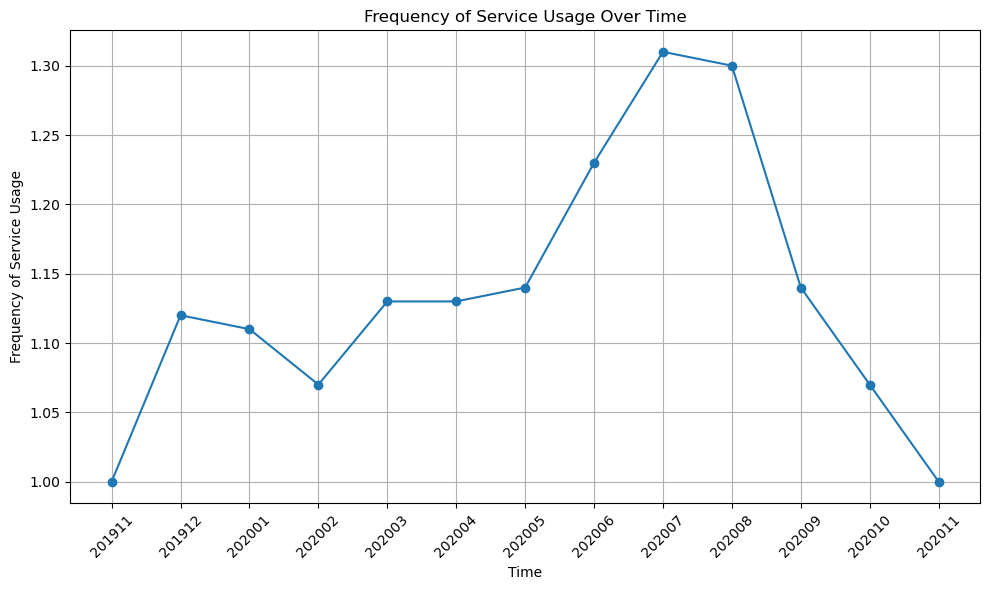

In [140]:
# service usage Over Time
#service_usage_over_time = cash_request_fee_merged.groupby('cohort')['fee_amount'].sum()

plt.figure(figsize=(10, 6))
plt.plot(frequency_usage_cohort.index, frequency_usage_cohort.values, marker='o', linestyle='-')
plt.title('Frequency of Service Usage Over Time')
plt.xlabel('Time')
plt.ylabel('Frequency of Service Usage')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [169]:
# calculate incident rate
# logic: fee table. type column = incident

#total ocurrences (only when there is a cash request ID in the fee table)
total_occurrences = cash_request_fee_merged['cash_request_id'].nunique()

#total incidents (count how many rows we have with type = incident)
total_incidents = len(cash_request_fee_merged[cash_request_fee_merged['type']=='incident'])

incident_rate = round(len(cash_request_fee_merged[cash_request_fee_merged['type']=='incident'])/total_occurrences,2)

print("Total occurrences:", total_occurrences)
print("Total incidents:", total_incidents)
print("Incident rate:", round((incident_rate*100),2), "%")

Total occurrences: 12497
Total incidents: 2030
Incident rate: 16.0 %


In [172]:
# calculate incident rate PER COHORT
# Grouping by 'cohort' and calculating total occurrences per cohort
occurrences_per_cohort = cash_request_fee_merged.groupby('cohort').size()

# Grouping by 'cohort' and calculating total incidents per cohort
incidents_per_cohort = cash_request_fee_merged[cash_request_fee_merged['type']=='incident'].groupby('cohort').size()

# Calculating incident rate per cohort
incident_rate_per_cohort = (incidents_per_cohort / occurrences_per_cohort).round(2)

# Printing results
for cohort, occurrences, incidents, rate in zip(occurrences_per_cohort.index, occurrences_per_cohort, incidents_per_cohort, incident_rate_per_cohort):
    print(f"Cohort: {cohort}")
    print(f"Total occurrences: {occurrences}")
    print(f"Total incidents: {incidents}")
    print(f"Incident rate: {rate * 100}%")
    print()

Cohort: 201911
Total occurrences: 1
Total incidents: 42
Incident rate: nan%

Cohort: 201912
Total occurrences: 230
Total incidents: 501
Incident rate: nan%

Cohort: 202001
Total occurrences: 176
Total incidents: 604
Incident rate: nan%

Cohort: 202002
Total occurrences: 157
Total incidents: 467
Incident rate: nan%

Cohort: 202003
Total occurrences: 207
Total incidents: 368
Incident rate: nan%

Cohort: 202004
Total occurrences: 418
Total incidents: 48
Incident rate: nan%



In [174]:
incidents_per_cohort

cohort
202005     42
202006    501
202007    604
202008    467
202009    368
202010     48
dtype: int64

In [175]:
occurrences_per_cohort

cohort
201911       1
201912     230
202001     176
202002     157
202003     207
202004     418
202005     878
202006    3171
202007    4230
202008    4835
202009    5740
202010    9342
202011     137
dtype: int64

In [173]:
#display(incident_rate_per_cohort)
print("Incident rate:", round((incident_rate_per_cohort*100),2), "%")

Incident rate: cohort
201911     NaN
201912     NaN
202001     NaN
202002     NaN
202003     NaN
202004     NaN
202005     5.0
202006    16.0
202007    14.0
202008    10.0
202009     6.0
202010     1.0
202011     NaN
dtype: float64 %


In [131]:
# calculate revenue generated (fees) successfully
## 


unsuccessful_statuses_fees = ['rejected', 'cancelled']
successful_filter = cash_request_fee_merged[~cash_request_fee_merged['fee_status'].isin(unsuccessful_statuses_fees)]

# Total distribution of successful cash advances
total_fees_successful_collected = successful_filter['fee_amount'].sum()

# Cohort-wise distribution of successful cash advances
cohort_fees_successful_collected = successful_filter.groupby('cohort')['fee_amount'].sum()

print("Total fee collected:", total_fees_successful_collected)
print("\nCohort-wise distribution of successful fees collected:")
print(cohort_fees_successful_collected)

Total fee collected: 72015.0

Cohort-wise distribution of successful fees collected:
cohort
201911        0.0
201912        0.0
202001        0.0
202002        0.0
202003        0.0
202004        0.0
202005      490.0
202006     4225.0
202007     4730.0
202008    11215.0
202009    16345.0
202010    34490.0
202011      520.0
Name: fee_amount, dtype: float64


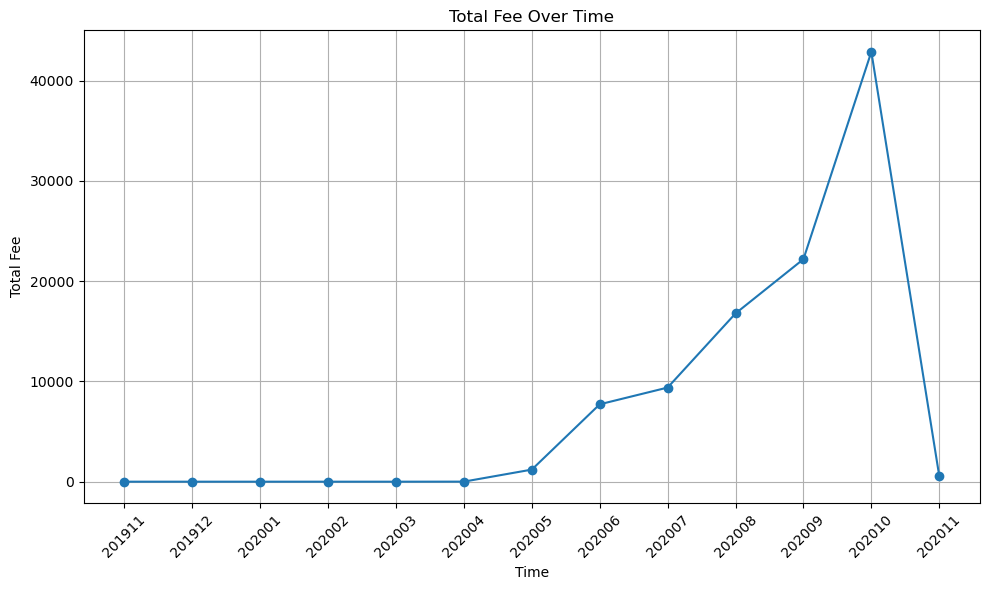

In [138]:
# check for outliers by plotting histograms (or other visualizations like boxplots)
# fee collection over time

# Total fee collection Over Time
fee_over_time = cash_request_fee_merged.groupby('cohort')['fee_amount'].sum()

plt.figure(figsize=(10, 6))
plt.plot(fee_over_time.index, fee_over_time.values, marker='o', linestyle='-')
plt.title('Total Fee Over Time')
plt.xlabel('Time')
plt.ylabel('Total Fee')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [141]:
display(successful_filter)

,cash_request_id_main,user_id,cohort,cash_request_amount,cash_request_status,cash_request_id,type,fee_status,fee_amount,charge_moment
0,5,804,201912,100.0,rejected,0.0,0,NaN,NaN,NaN
1,70,231,201912,100.0,rejected,0.0,0,NaN,NaN,NaN
2,7,191,201912,100.0,rejected,0.0,0,NaN,NaN,NaN
3,10,761,201912,99.0,rejected,0.0,0,NaN,NaN,NaN
4,1594,7686,202005,100.0,rejected,0.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
32089,22357,82122,202010,100.0,money_back,22357.0,instant_payment,accepted,5.0,after
32090,20256,64517,202010,100.0,money_back,20256.0,postpone,accepted,5.0,before
32091,20256,64517,202010,100.0,money_back,20256.0,instant_payment,accepted,5.0,after
32092,19886,44867,202010,100.0,direct_debit_sent,19886.0,postpone,accepted,5.0,before


In [132]:
# What is the distribution of successful cash advances per cohort? (TOTAL and cohort)
# unsuccessful: rejected, transaction_declined, canceled

#Cohort
unsuccessful_statuses = ['rejected', 'transaction_declined', 'cancelled']
successful_cash_advances = cash_request_fee_merged[~cash_request_fee_merged['cash_request_status'].isin(unsuccessful_statuses)]

# Total distribution of successful cash advances
total_successful_distribution = successful_cash_advances['cash_request_amount'].sum()

# Cohort-wise distribution of successful cash advances
cohort_successful_distribution = successful_cash_advances.groupby('cohort')['cash_request_amount'].sum()

print("Total distribution of successful cash advances:", total_successful_distribution)
print("\nCohort-wise distribution of successful cash advances:")
print(cohort_successful_distribution)

Total distribution of successful cash advances: 2024583.0

Cohort-wise distribution of successful cash advances:
cohort
201911         1.0
201912     14298.0
202001      8799.0
202002     10265.0
202003     14600.0
202004     28883.0
202005     67198.0
202006    227883.0
202007    270215.0
202008    323973.0
202009    389238.0
202010    658870.0
202011     10360.0
Name: cash_request_amount, dtype: float64


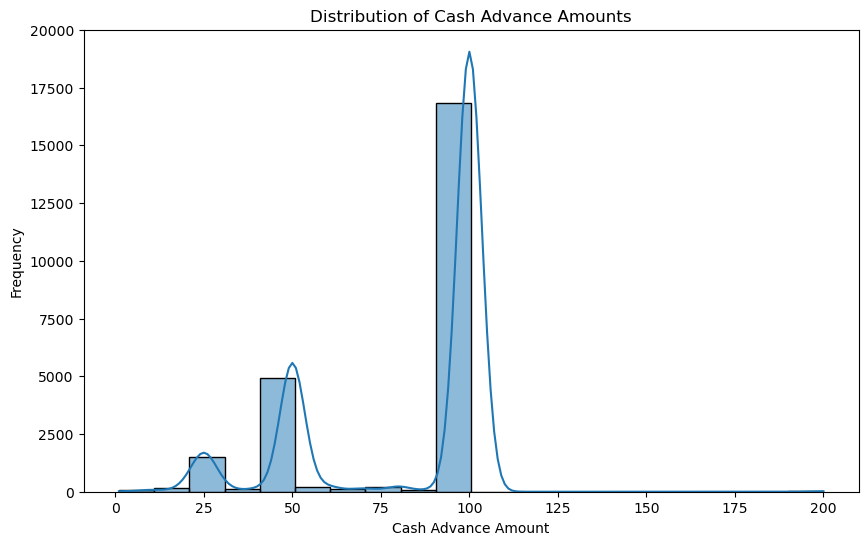

In [145]:
# Plot histogram of cash advance amounts
plt.figure(figsize=(10, 6))
sns.histplot(data=successful_cash_advances, x='cash_request_amount', bins=20, kde=True)
plt.title('Distribution of Cash Advance Amounts')
plt.xlabel('Cash Advance Amount')
plt.ylabel('Frequency')
plt.show()

In [151]:
#saving my sliced dataframes in csv

cash_request_fee_merged.to_csv('project_dataset/cash_request_fee_merged.csv', index=False)

In [152]:
display(cash_request_fee_merged)

,cash_request_id_main,user_id,cohort,cash_request_amount,cash_request_status,cash_request_id,type,fee_status,fee_amount,charge_moment
0,5,804,201912,100.0,rejected,0.0,0,NaN,NaN,NaN
1,70,231,201912,100.0,rejected,0.0,0,NaN,NaN,NaN
2,7,191,201912,100.0,rejected,0.0,0,NaN,NaN,NaN
3,10,761,201912,99.0,rejected,0.0,0,NaN,NaN,NaN
4,1594,7686,202005,100.0,rejected,0.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
32089,22357,82122,202010,100.0,money_back,22357.0,instant_payment,accepted,5.0,after
32090,20256,64517,202010,100.0,money_back,20256.0,postpone,accepted,5.0,before
32091,20256,64517,202010,100.0,money_back,20256.0,instant_payment,accepted,5.0,after
32092,19886,44867,202010,100.0,direct_debit_sent,19886.0,postpone,accepted,5.0,before


In [153]:
cash_request_fee_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29522 entries, 0 to 32093
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cash_request_id_main  29522 non-null  int64  
 1   user_id               29522 non-null  int32  
 2   cohort                29522 non-null  object 
 3   cash_request_amount   29522 non-null  float64
 4   cash_request_status   29522 non-null  object 
 5   cash_request_id       29522 non-null  float64
 6   type                  29522 non-null  object 
 7   fee_status            20151 non-null  object 
 8   fee_amount            20151 non-null  float64
 9   charge_moment         20151 non-null  object 
dtypes: float64(3), int32(1), int64(1), object(5)
memory usage: 3.4+ MB


In [ ]:
# what i would like to do if i had more time:
## create another df user based with more aggregated data, so I can perform relevant correlation analysis on user level.